# Circular statistics

This notebook reproduces the examples of Berens (2009) implemented in the Matlab [CircStats](https://www.mathworks.com/matlabcentral/fileexchange/10676-circular-statistics-toolbox-directional-statistics) toolbox.

## Part I | Artificial data

In [1]:
import numpy as np
import pandas as pd

alpha_deg = np.array([13,15,21,26,28,30,35,36,41,60,92,103,
                      165,199,210, 250,301,320,343,359])

beta_deg = np.array([1,13,41,56,67,71,81,85,99,110,119,131,
                     145,177,199,220,291,320,340,355])

# Convert to radians
alpha_rad = np.deg2rad(alpha_deg)
beta_rad = np.deg2rad(beta_deg)

### Descriptive statistics

In [2]:
from scipy.stats import circmean, circstd
print('Alpha mean: %.2f, beta mean: %.2f' % (circmean(alpha_rad), circmean(beta_rad)))
print('Alpha std: %.2f, beta std: %.2f' % (circstd(alpha_rad), circstd(beta_rad)))

Alpha mean: 0.41, beta mean: 1.27
Alpha std: 1.26, beta std: 1.44


### Plot

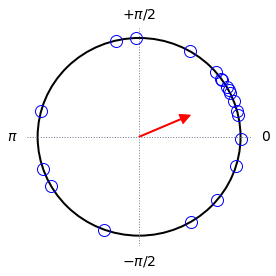

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from pingouin import circ_r

%matplotlib inline

# Convert angles to unit vector
z = np.exp(1j * alpha_rad)

# Plot circle
fig, ax = plt.subplots(figsize=(4, 4))
circle = Circle((0, 0), 1, edgecolor='k', facecolor='none', linewidth=2)
ax.add_patch(circle)
ax.axvline(0, lw=1, ls=':', color='slategrey')
ax.axhline(0, lw=1, ls=':', color='slategrey')
ax.plot(np.real(z), np.imag(z), 'bo', mfc='none', ms=12)

# Plot mean resultant vector
r = circ_r(alpha_rad)
phi = circmean(alpha_rad)
zm = r * np.exp(1j * phi);
ax.arrow(0, 0, np.real(zm), np.imag(zm), width=0.01, head_width=0.1, 
         head_length=0.1, fc='r', ec='r')

# X and Y ticks in radians
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.text(1.2, 0, '0', fontsize=14, verticalalignment='center')
ax.text(-1.3, 0, '$\pi$', fontsize=14, verticalalignment='center')
ax.text(0, 1.2, '$+\pi/2$', fontsize=14, horizontalalignment='center')
_ = ax.text(0, -1.3, '$-\pi/2$', fontsize=14, horizontalalignment='center')

### Inferential statistics

In [4]:
from pingouin.circular import circ_rayleigh

# Rayleigh test for uniformity
print('Alpha:\tz = %.2f, p = %.3f' % circ_rayleigh(alpha_rad))
print('Beta:\tz = %.2f, p = %.3f' % circ_rayleigh(beta_rad))

Alpha:	z = 4.06, p = 0.015
Beta:	z = 2.53, p = 0.078


### Correlations

In [5]:
from pingouin import circ_corrcc, circ_corrcl

# Circular-circular correlations of alpha and beta
print('Circular-circular correlation:\tr = %.2f, p = %.3f' % circ_corrcc(alpha_rad, beta_rad))

# Circular-linear correlation of alpha with range(20)
print('Circular-linear correlation:\tr = %.2f, p = %.3f' % circ_corrcl(alpha_rad, np.arange(alpha_rad.size)))

Circular-circular correlation:	r = 0.67, p = 0.007
Circular-linear correlation:	r = 0.64, p = 0.017


## Part II | Neuron firing

The dataset provides the orientation tuning properties of three neurons recorded from the primary visual cortex of awake macaques. The number of action potentials is modulated by the orientation of a visual stimulus.  The main variables are (1) the stimulus orientations (spaced 22.5 degrees apart) and (2) the number of spikes fired in response to each orientation of the stimulus.

In [6]:
from pingouin.datasets import read_dataset

# Load Berens (2009) neuron dataset
df = read_dataset('circular')

df.head()

,Orientation,N1Spikes,N2Spikes,N3Spikes
0,0.0,63,25,10
1,22.5,66,15,5
2,45.0,79,12,5
3,67.5,171,2,0
4,90.0,101,12,2


### Descriptive statistics

Warning: the scipy.stats circular functions do not accept binned angle data.

In [7]:
from pingouin import circ_axial, circ_mean

# Convert the orientation to radians.
ori = circ_axial(np.deg2rad(df['Orientation'].values), 2)
spacing = np.diff(ori)[0]

# We will only focus on the first neuron.
spk = df['N1Spikes'].values

# Circular mean angle
print('Circular mean:\t%.2f' % circ_mean(ori, spk))

Circular mean:	2.36


### Inferential statistics

In [8]:
z, pval = circ_rayleigh(ori, spk, spacing)
print('z = %.2f, p = %.3f' % (z, pval))

z = 42.83, p = 0.000
